In [1]:
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



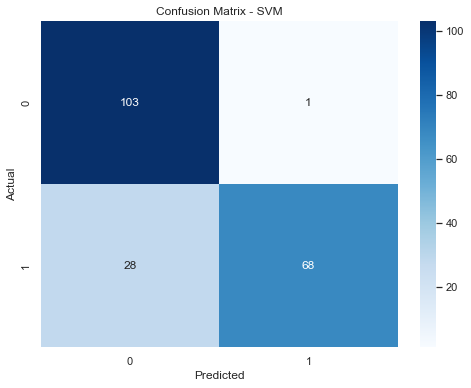

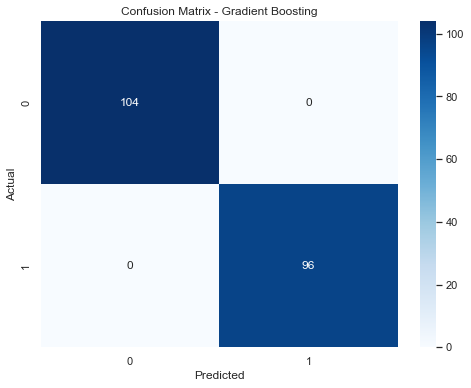

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

# Load the synthetic health data into a DataFrame
df = pd.read_csv('burr leukema cases.csv')

# Separate the features (independent variables) and the target variable
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Machine (SVM) Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict on the test set using SVM
svm_pred = svm_model.predict(X_test)

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Predict on the test set using Gradient Boosting
gb_pred = gb_model.predict(X_test)

# Create confusion matrices
svm_cm = confusion_matrix(y_test, svm_pred)
gb_cm = confusion_matrix(y_test, gb_pred)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the confusion matrix for Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


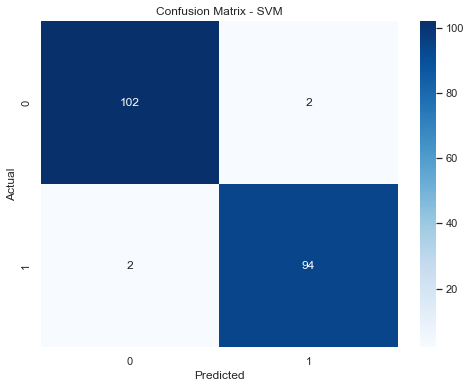

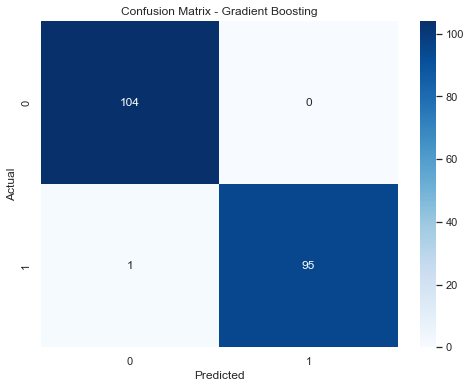

Best hyperparameters for SVM: {'C': 1, 'kernel': 'linear'}
Best hyperparameters for Gradient Boosting: {'learning_rate': 0.5, 'n_estimators': 100}


In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

# Load the synthetic health data into a DataFrame
df = pd.read_csv('burr leukema cases.csv')

# Separate the features (independent variables) and the target variable
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Machine (SVM) Classifier
svm_model = SVC()

# Hyperparameter tuning with GridSearchCV for SVM
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

# Predict on the test set using SVM
svm_pred = svm_grid_search.predict(X_test)

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()

# Hyperparameter tuning with GridSearchCV for Gradient Boosting
gb_param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.5, 1.0]}
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5)
gb_grid_search.fit(X_train, y_train)

# Predict on the test set using Gradient Boosting
gb_pred = gb_grid_search.predict(X_test)

# Create confusion matrices
svm_cm = confusion_matrix(y_test, svm_pred)
gb_cm = confusion_matrix(y_test, gb_pred)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the confusion matrix for Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the best hyperparameters found for SVM and Gradient Boosting
print("Best hyperparameters for SVM:", svm_grid_search.best_params_)
print("Best hyperparameters for Gradient Boosting:", gb_grid_search.best_params_)


In [20]:
import numpy as np
import pandas as pd
#df = pd.read_csv ('LEUKEMIADATA.csv')
df = pd.read_csv ('burr leukema cases.csv')
df

,WBC,RBC,Hemoglobin,Hemotocrit,MCV,Plt_Count,Lymph_Count,Mo_Count,Neu_per,Lymp_Per,Bas_Per,Eo_Per,Mo_Per,Target
0,4.32,3.13,8.85,25.89,53.43,0.46,1.01,0.36,0.58,64.07,0.28,0.74,12.31,1
1,14.69,3.70,10.69,31.90,57.46,0.64,0.43,0.31,1.79,12.57,0.24,0.95,16.73,1
2,53.54,3.00,11.91,35.51,59.32,0.94,1.59,4.71,1.88,14.83,0.54,2.72,3.23,1
3,5.50,5.23,9.22,26.98,61.20,2.46,9.22,0.64,2.32,0.22,0.67,0.14,9.60,1
4,1.33,3.35,6.92,20.27,64.04,2.51,12.54,3.96,2.37,7.86,0.39,0.96,5.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,19.60,4.13,11.29,41.57,105.45,319.13,2.84,1.69,56.47,55.17,0.46,8.18,9.76,0
996,19.23,3.49,10.75,37.96,105.46,230.34,1.77,1.80,52.58,55.44,0.44,8.30,5.76,0
997,26.05,4.70,11.61,40.67,107.16,216.93,2.30,1.89,72.10,55.78,0.50,9.52,4.45,0
998,24.05,3.80,12.62,34.25,109.99,241.92,4.43,1.90,72.17,62.45,0.36,9.87,5.33,0


In [21]:
#defing target varaible v and independant variable x
Y = df.Target                       
list = ['Target']
x = df.drop(list,axis = 1 )
x.head()

,WBC,RBC,Hemoglobin,Hemotocrit,MCV,Plt_Count,Lymph_Count,Mo_Count,Neu_per,Lymp_Per,Bas_Per,Eo_Per,Mo_Per
0,4.32,3.13,8.85,25.89,53.43,0.46,1.01,0.36,0.58,64.07,0.28,0.74,12.31
1,14.69,3.70,10.69,31.90,57.46,0.64,0.43,0.31,1.79,12.57,0.24,0.95,16.73
2,53.54,3.00,11.91,35.51,59.32,0.94,1.59,4.71,1.88,14.83,0.54,2.72,3.23
3,5.50,5.23,9.22,26.98,61.20,2.46,9.22,0.64,2.32,0.22,0.67,0.14,9.60
4,1.33,3.35,6.92,20.27,64.04,2.51,12.54,3.96,2.37,7.86,0.39,0.96,5.02


In [12]:
# from sklearn.preprocessing import MinMaxScaler

# # Create an instance of the MinMaxScaler
# scaler = MinMaxScaler()

# # Apply normalization to the independent variables
# x_normalized = scaler.fit_transform(x)

# # Convert the normalized data back to a DataFrame
# x_normalized = pd.DataFrame(x_normalized, columns=x.columns)

# x_normalized.head()  # Display the first few rows of the normalized data


,WBC,RBC,Hemoglobin,Hemotocrit,MCV,Plt_Count,Lymph_Count,Mo_Count,Neu_per,Lymp_Per,Bas_Per,Eo_Per,Mo_Per
0,0.000141,0.334437,0.269914,0.259866,0.000000,0.000000,0.001345,0.000134,0.000000,0.393117,0.020164,0.023910,0.090998
1,0.000496,0.428808,0.391047,0.386020,0.060647,0.000145,0.000573,0.000116,0.007067,0.076037,0.017177,0.030695,0.124074
2,0.001825,0.312914,0.471363,0.461797,0.088638,0.000387,0.002118,0.001757,0.007592,0.089952,0.039582,0.087884,0.023049
3,0.000182,0.682119,0.294273,0.282746,0.116930,0.001613,0.012283,0.000239,0.010162,0.000000,0.049291,0.004523,0.070718
4,0.000039,0.370861,0.142857,0.141898,0.159669,0.001653,0.016705,0.001477,0.010454,0.047039,0.028379,0.031018,0.036444


In [13]:
# from sklearn.preprocessing import StandardScaler

# # Create an instance of the StandardScaler
# scaler = StandardScaler()

# # Apply standardization to the independent variables
# x_standardized = scaler.fit_transform(x)

# # Convert the standardized data back to a DataFrame
# x_standardized = pd.DataFrame(x_standardized, columns=x.columns)

# x_standardized.head()  # Display the first few rows of the standardized data


,WBC,RBC,Hemoglobin,Hemotocrit,MCV,Plt_Count,Lymph_Count,Mo_Count,Neu_per,Lymp_Per,Bas_Per,Eo_Per,Mo_Per
0,-0.093751,-0.813671,-1.002539,-1.037151,-4.353221,-1.575996,-0.172130,-0.077315,-2.259608,1.517098,-0.455106,-0.790195,0.181281
1,-0.085868,-0.226242,-0.280240,-0.247714,-3.809385,-1.574594,-0.192513,-0.077887,-2.208290,-0.984220,-0.508519,-0.703731,0.579872
2,-0.056332,-0.947646,0.198675,0.226474,-3.558383,-1.572257,-0.151748,-0.027547,-2.204473,-0.874453,-0.107921,0.025042,-0.637544
3,-0.092854,1.350539,-0.857294,-0.893975,-3.304683,-1.560418,0.116391,-0.074112,-2.185812,-1.584050,0.065671,-1.037237,-0.063104
4,-0.096024,-0.586944,-1.760167,-1.775360,-2.921434,-1.560029,0.233065,-0.036128,-2.183692,-1.212981,-0.308220,-0.699613,-0.476123


In [22]:
 #Split the dataset into training and testing sets
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

# Create an SVM classifier
classifier = svm.SVC(kernel='linear')

# Train the classifier on the training data
classifier.fit(x_train, Y_train)

# Make predictions on the test data
Y_pred = classifier.predict(x_test)

0.98
 Accuracy 0.98
0.98
Negative value accuracy = 0.02
0.020000000000000018
Sensitivity = 0.9791666666666666
specificity = 0.9807692307692307
False possitive rate = 0.019230769230769232
Precision = 0.9791666666666666
0.9791666666666666
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       104
           1       0.98      0.98      0.98        96

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



<AxesSubplot:title={'center':'Support Vector Machine'}>

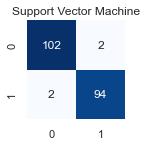

In [23]:
from sklearn import metrics
print(metrics.accuracy_score(Y_test, Y_pred))

confusion = metrics.confusion_matrix(Y_test, Y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
#Acuuracy
print(" Accuracy", (TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(Y_test, Y_pred))
#negative value accuracy
print("Negative value accuracy =", (FP + FN) / (TP + TN + FP + FN))
print(1 - metrics.accuracy_score(Y_test, Y_pred))
#
#Sensitivity
print("Sensitivity =", TP / (TP + FN))

#specificity
print("specificity =", TN/(TN + FP))

#False possitive rate
print("False possitive rate =", FP / (TN + FP))

#Precision
print("Precision =", TP / (TP + FP))
print(metrics.precision_score(Y_test, Y_pred))

#Classification report
from sklearn.metrics import classification_report 
print(classification_report (Y_test,Y_pred))
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.subplot(2,3,3)
plt.title("Support Vector Machine")
sns.heatmap(confusion,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 12})


In [24]:
from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Create an SVM classifier with default parameters
svm_model = svm.SVC()

# Define the cross-validation fold generator
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold cross-validation and calculate the mean accuracy score
scores = cross_val_score(svm_model, x, Y, cv=cv)
mean_score = np.mean(scores)

# Print the scores and mean score
print(f'Scores for each fold: {scores}')
print(f'Mean score: {mean_score:.4f}')


Scores for each fold: [0.87 0.84 0.8  0.76 0.74 0.82 0.89 0.8  0.88 0.78]
Mean score: 0.8180


In [17]:
 #Split the dataset into training and testing sets
x_train, x_test, Y_train, Y_test = train_test_split(x_standardized, Y, test_size=0.2, random_state=42)

# Create an SVM classifier
classifier = svm.SVC(kernel='linear')

# Train the classifier on the training data
classifier.fit(x_train, Y_train)

# Make predictions on the test data
Y_pred = classifier.predict(x_test)

0.975
 Accuracy 0.975
0.975
Negative value accuracy = 0.025
0.025000000000000022
Sensitivity = 0.96875
specificity = 0.9807692307692307
False possitive rate = 0.019230769230769232
Precision = 0.9789473684210527
0.9789473684210527
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       104
           1       0.98      0.97      0.97        96

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



<AxesSubplot:title={'center':'Support Vector Machine'}>

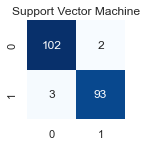

In [18]:
from sklearn import metrics
print(metrics.accuracy_score(Y_test, Y_pred))

confusion = metrics.confusion_matrix(Y_test, Y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
#Acuuracy
print(" Accuracy", (TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(Y_test, Y_pred))
#negative value accuracy
print("Negative value accuracy =", (FP + FN) / (TP + TN + FP + FN))
print(1 - metrics.accuracy_score(Y_test, Y_pred))
#
#Sensitivity
print("Sensitivity =", TP / (TP + FN))

#specificity
print("specificity =", TN/(TN + FP))

#False possitive rate
print("False possitive rate =", FP / (TN + FP))

#Precision
print("Precision =", TP / (TP + FP))
print(metrics.precision_score(Y_test, Y_pred))

#Classification report
from sklearn.metrics import classification_report 
print(classification_report (Y_test,Y_pred))
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.subplot(2,3,3)
plt.title("Support Vector Machine")
sns.heatmap(confusion,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 12})


In [19]:
from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Create an SVM classifier with default parameters
svm_model = svm.SVC()

# Define the cross-validation fold generator
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold cross-validation and calculate the mean accuracy score
scores = cross_val_score(svm_model, x, Y, cv=cv)
mean_score = np.mean(scores)

# Print the scores and mean score
print(f'Scores for each fold: {scores}')
print(f'Mean score: {mean_score:.4f}')


Scores for each fold: [0.87 0.84 0.8  0.76 0.74 0.82 0.89 0.8  0.88 0.78]
Mean score: 0.8180
